In [39]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score

## Read the training and test data sets previously split and stored as separage csv files
## The last column labelled '86' is the 0/1 label indicationg benign/malware for each sample row.

## We will split the training data into a set for actual training and a validation set.
## That way we can tune the model before doing a final evaluation with the test data set.
df_train_and_valid = pd.read_csv("data/train_data.csv")
df_test = pd.read_csv("data/test_data.csv")

df_train, df_valid = train_test_split(df_train_and_valid, test_size = 0.25, random_state=47)
num_columns = df_train.shape[1]
X_train = df_train.iloc[:,:num_columns-1]
y_train = df_train.iloc[:,num_columns-1]
X_valid = df_valid.iloc[:,:num_columns-1]
y_valid = df_valid.iloc[:,num_columns-1]
X_test = df_test.iloc[:,:num_columns-1]
y_test = df_test.iloc[:,num_columns-1]

In [40]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.model_selection import GridSearchCV

In [41]:
def trainDTC_Model(**kwargs):
    model = DecisionTreeClassifier(**kwargs)
    model.fit(X_train, y_train)
    return model

(15399, 74)
DecisionTreeClassifier(criterion='entropy', max_depth=3)


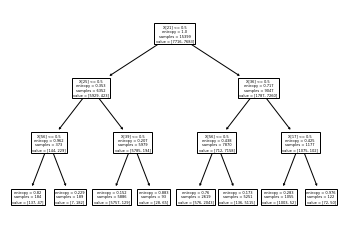

In [48]:
print(X_train.shape)
model = trainDTC_Model(criterion='entropy', max_depth=3,)
plot_tree(model, max_depth=3)
print(model)

(15399, 74)
DecisionTreeClassifier(max_depth=3)


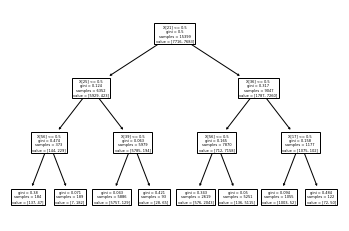

In [52]:
print(X_train.shape)
model = trainDTC_Model(criterion='gini', max_depth=3,)
plot_tree(model, max_depth=3)
print(model)

In [53]:
from sklearn.tree import export_graphviz
import graphviz
from six import StringIO
from IPython.display import Image
import pydotplus

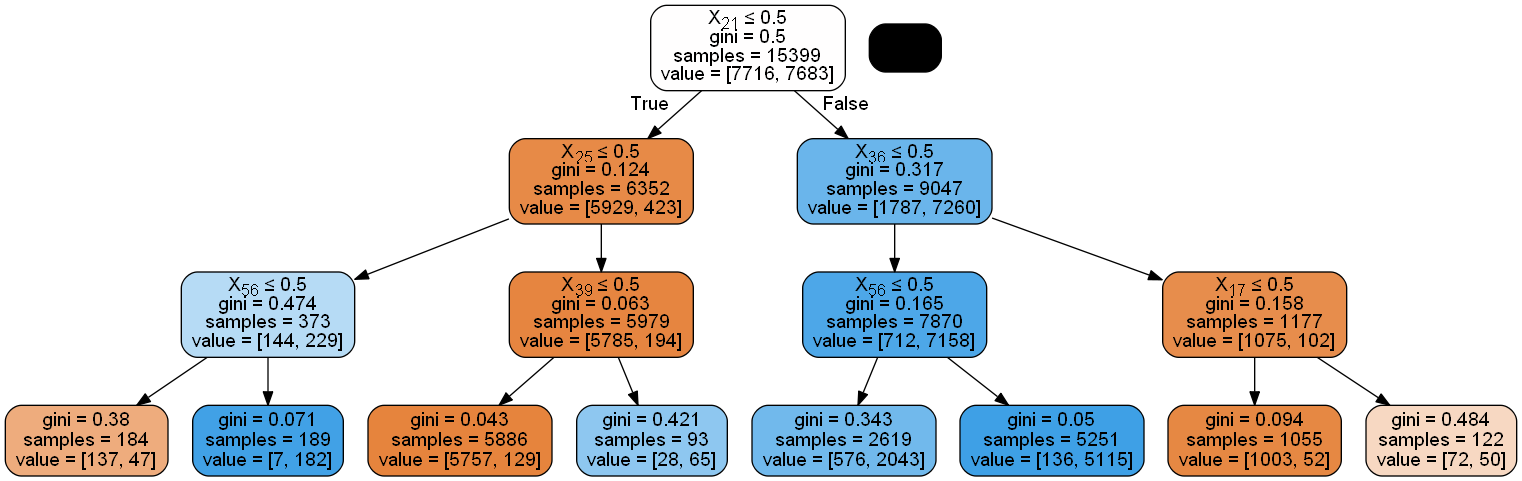

In [54]:
dot_data = StringIO()
export_graphviz(model, out_file=dot_data, filled=True, rounded=True, special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

In [55]:
yp = model.predict(X_valid)
pd.DataFrame(confusion_matrix(y_valid,yp))

,0,1
0,2288,280
1,88,2477


In [47]:
yp = model.predict(X_test)
pd.DataFrame(confusion_matrix(y_test,yp))

,0,1
0,3930,418
1,131,4321


In [38]:
df_test.to_csv?